In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider

In [3]:
# Keras functions
from keras.models import Sequential, Model
from keras.layers import Input, Lambda, concatenate
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose, UpSampling2D
from keras.optimizers import SGD, Adam
from keras import metrics

# Keras dataset
from keras.datasets import mnist

# Keras utilis function
from keras.utils import np_utils

from keras import backend as K

Using TensorFlow backend.


In [4]:
# 讀入 MNIST 數據庫
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

x_train = x_train0.reshape(60000, -1)    # -1為numpy自動計算
x_test = x_test0.reshape(10000, -1)

# 正規化
x_train -= x_train.min()
x_train = x_train/x_train.max()

x_test-=x_test.min()
x_test=x_test/x_test.max()

In [5]:
enc_1=Dense(100,activation='relu')

enc_mean=Dense(2)
enc_log_var=Dense(2)

dec_2=Dense(100,activation='relu')
dec_1=Dense(784,activation='sigmoid')

In [6]:
x = Input(shape=(784,))
enc_x = enc_1(x)

z_mean = enc_mean(enc_x)
z_log_var = enc_log_var(enc_x)

In [7]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(2,), mean=0., stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [8]:
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

In [9]:
dec_x = dec_2(z)
x_hat = dec_1(dec_x)

In [10]:
VAE = Model(x, x_hat)
VAE.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 100)          78500       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            202         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            202         dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

In [11]:
def vae_loss(x, x_recon):  
    recovery_loss = 784 * metrics.binary_crossentropy(x, x_recon)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return recovery_loss + kl_loss

In [12]:
# 開始訓練
VAE.compile(loss=vae_loss, optimizer=Adam())

In [13]:
VAE.fit(x_train, x_train, batch_size=32, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 12s 193us/step - loss: 188.8564
Epoch 2/100
60000/60000 [==============================] - 11s 191us/step - loss: 169.2174
Epoch 3/100
60000/60000 [==============================] - 11s 180us/step - loss: 166.1459
Epoch 4/100
60000/60000 [==============================] - 11s 183us/step - loss: 163.5547
Epoch 5/100
60000/60000 [==============================] - 11s 181us/step - loss: 161.6356
Epoch 6/100
60000/60000 [==============================] - 11s 184us/step - loss: 160.2551
Epoch 7/100
60000/60000 [==============================] - 11s 183us/step - loss: 159.2232
Epoch 8/100
60000/60000 [==============================] - 9s 144us/step - loss: 158.4113
Epoch 9/100
60000/60000 [==============================] - 8s 139us/step - loss: 157.7707
Epoch 10/100
60000/60000 [==============================] - 9s 145us/step - loss: 157.2172
Epoch 11/100
60000/60000 [==============================] - 8s 137us/step - loss: 156.6616
E

60000/60000 [==============================] - 9s 154us/step - loss: 147.9045
Epoch 91/100
60000/60000 [==============================] - 9s 155us/step - loss: 147.9195
Epoch 92/100
60000/60000 [==============================] - 10s 170us/step - loss: 147.8875
Epoch 93/100
60000/60000 [==============================] - 11s 177us/step - loss: 147.8804
Epoch 94/100
60000/60000 [==============================] - 10s 160us/step - loss: 147.7672
Epoch 95/100
60000/60000 [==============================] - 10s 164us/step - loss: 147.8372
Epoch 96/100
60000/60000 [==============================] - 9s 153us/step - loss: 147.7437
Epoch 97/100
60000/60000 [==============================] - 10s 160us/step - loss: 147.6612
Epoch 98/100
60000/60000 [==============================] - 10s 168us/step - loss: 147.6916
Epoch 99/100
60000/60000 [==============================] - 10s 164us/step - loss: 147.7212
Epoch 100/100
60000/60000 [==============================] - 10s 163us/step - loss: 147.6224


In [14]:
VAE_Encoder = Model(x, z_mean)

VAE_Encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [16]:
h_input = Input(shape=(2,))
VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))

VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [17]:
VAE_Decoder = Model(h_input, dec_1(dec_2(h_input)))

VAE_Decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_5 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


In [18]:
#  Encoder 的視覺化呈現
idx = np.random.randint(x_train.shape[0])
print("第 %d 圖的 latent 表示為 %s" %(idx, VAE_Encoder.predict(x_train[idx: idx+1])))


第 6926 圖的 latent 表示為 [[-0.36590457 -1.9505823 ]]


In [19]:
indices = np.random.randint(x_test.shape[0], size=3000)

In [20]:
VAE_latents = VAE_Encoder.predict(x_test[indices])

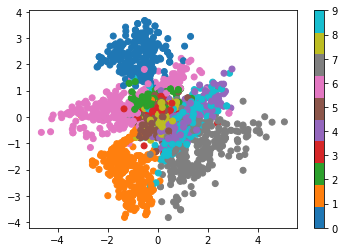

In [21]:
plt.scatter(VAE_latents[:, 0], VAE_latents[:, 1], c=y_test0[indices], cmap='tab10')
plt.colorbar()
plt.show()

In [22]:
#  Decoder 的視覺化呈現
def normalized(x):
    x -= x.min()
    x /= x.max()
    return x

In [23]:
n=20
digit_size=28
grid_x_vae = np.linspace(-4+0.05, 4-0.05, n)
grid_y_vae = np.linspace(-4+0.05, 4-0.05, n)
VAE_figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_x_vae):
    for j, xi in enumerate(grid_y_vae):
        z_sample = np.array([[xi, yi]])
        x_decoded = VAE_Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        VAE_figure[(n-i-1) * digit_size: (n - i) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = normalized(digit)

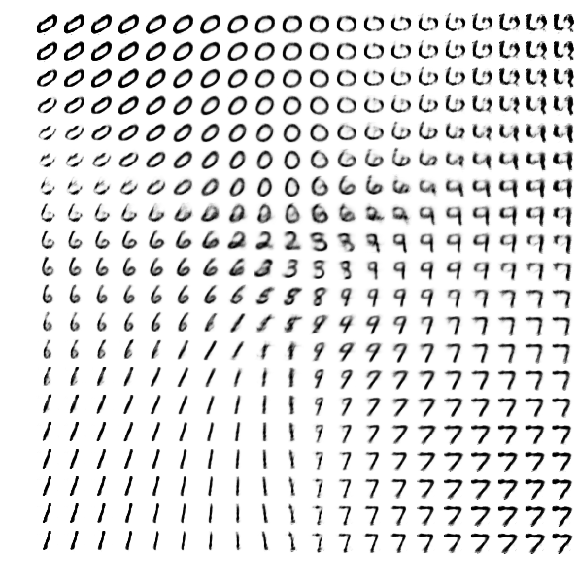

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(VAE_figure, cmap='Greys')
plt.axis('off')
plt.show()

In [25]:
def inBetween(t):
    data_0 = x_train0[idx_1]
    data_1 = x_train0[idx_2]
    data_t = (1-t)*x_train0[idx_1] + t*x_train0[idx_2]

    mu_0 = VAE_Encoder.predict(x_train[idx_1:idx_1+1]).squeeze()
    mu_1 = VAE_Encoder.predict(x_train[idx_2:idx_2+1]).squeeze()
    mu_t = (1-t)*mu_0 + t*mu_1

    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(2, 1, 2)
    ax1.scatter(mu_0[0], mu_0[1])
    ax1.scatter(mu_1[0], mu_1[1])
    ax1.scatter(mu_t[0], mu_t[1])
    ax1.plot([mu_0[0], mu_1[0]], [mu_0[1], mu_1[1]])
    ax1.annotate(str(mu_t[0]) + ', ' + str(mu_t[1]) , (mu_t[0], mu_t[1]))
    

    ax2 = plt.subplot(2, 3, 1)
    ax2.imshow(data_0, cmap='Greys')

    ax3 = plt.subplot(2, 3, 2)
    ax3.imshow(data_t, cmap='Greys')

    ax4 = plt.subplot(2, 3, 3)
    ax4.imshow(data_1, cmap='Greys')

In [26]:
idx_1, idx_2 = np.random.randint(x_test.shape[0], size=2)
data_0 = x_train0[idx_1]
data_1 = x_train0[idx_2]

In [27]:
interact(inBetween, t=FloatSlider(value=0.5, min=0, max=1.0, step=0.01,))

interactive(children=(FloatSlider(value=0.5, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.inBetween(t)>